# Clustering

In this case study, we will use Data Mining algorithms to cluster iris flower samples based on features such as *petal width*, *petal length*, *sepal width*, and *sepal length*. 
* We will explore and visualise the available data.
* We will compare different clustering algorithms, namely: *k-means*, *hierarchical clustering*, and *DBSCAN*.
* We will evaluate the performance of the aforementioned algorithms.
* We will characterise the obtained clusters using *Apriori algorithm*.

<div style="text-align: center;">
    <img src="../img/blueflagiris_flower.jpg" width="300" height="200">
    <p><em>Iris flower.</em> Source: <a href="https://www.fs.usda.gov/wildflowers/beauty/iris/flower.shtml">https://www.fs.usda.gov/wildflowers/beauty/iris/flower.shtml</a></p>
</div>

<div style="text-align: center;">
    <img src="../img/iris-flower-types.png" width="500" height="200">
    <p><em>Iris flower.</em> Source: <a href="https://plainenglish.io/blog/iris-flower-classification-step-by-step-tutorial-c8728300dc9e">https://plainenglish.io/blog/iris-flower-classification-step-by-step-tutorial-c8728300dc9e</a></p>
</div>

**Note**: in this dataset, each entry is assigned to a class (a type of iris flower). However, in most real-world scenarios where we apply clustering procedures, true labels are unknown. So for the purpose of clustering, we will not consider the true class label.

## Task #1: Import Dataset and Libraries

In [1]:
# installation of required libraries and dependencies
# numeric calculations
! pip install numpy==1.26.0 
# data frames 
! pip install pandas==2.1.1 
# machine learning algorithms 
! pip install scikit-learn==1.5.1 
! pip install scipy==1.12.0
# plotting 
! pip install plotly==5.24.1 
! pip install matplotlib==3.8.0 
! pip install seaborn==0.13.2 
! pip install plotly-express==0.4.1 
! pip install chart-studio==1.1.0 
# web app library 
! pip install streamlit==1.37.1 
# association rules
! pip install mlxtend==0.23.3 

! pip install nbformat==5.9.2


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# load pandas to deal with the data
import pandas as pd
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# create interactive plots
import plotly.express as px 
# numeric calculations
import numpy as np

In [ ]:
# load data from table file where entries are separated with a space
data = pd.read_table("../data/IrisDataset/data.all", sep=" ")
# show first 5 rows of the dataframe
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**QUESTIONS**

* How many samples exist in the dataframe?

*Hint*: you can check the number of rows of a dataframe using `len` function.
* What are the features? What are their types?

*Hint*: you can check the columns of a dataframe using [`columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) attribute. To get a summarasied information about the data in a dataframe, you can use [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method.
* How many distinct flower classes exist in the dataframe? What are they? 

*Hint*: you can use the methods [`nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) and [`unique()`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html).

In [4]:
# ANSWERS
len(data)

150

In [5]:
# ANSWERS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Using `data.info()`, we note that four features (`sepal length`, `sepal width`, `petal length`, `petal width`) are given by real numbers (`Dtype` is equal to `float64`). These are quantative features (variables). In contrast, `class` attribute is of type `object`, which implies that it is a caategorical feature. 

In [6]:
# ANSWERS
print(f"There are {data['class'].nunique()} unique classes : {', '.join(data['class'].unique())}")

There are 3 unique classes : Iris-setosa, Iris-versicolor, Iris-virginica


## Task #2: Perform Exploratory Data Analysis

First, we will explore the most common **data quality issues**:
* [missing values](#missing-vals)
* [duplicates](#duplicates)

Second, we will use [**descriptive statistics**](#desc-stats) to have get a statistical summary of the data. 

We will then use [**data visualisaiton**](#data-vis) to get a better understanding of the data.

<a id="missing-vals"></a>
### Missing Values

To check the missing values, several approaches can be used:

1. The `info()` mwthods provides a summary of a dataframe in terms of the types of values, non-null values and memory usage. Thus, by comparing the number of non-null values of each column with the total number of entries, one can have an idea of missing values.
2. Using the [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) method. By summing the resulting values, we obtain the number of null values for each column.
3. To get the rows with any missing values, you can use `isna()` followed by `any(axis=1)`.

In [7]:
# method 1: info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As there are as many non-null values for each of the attributes (`150 non-null`) than the total number of rows (see `RangeIndes: 150 entries`), it means that there is no *missin values* in our DataFrame.

In [8]:
# method 2: using isna() 
data.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

Again, we can see that there is no missing values in the DataFrame.

In [9]:
# method 3: get the rwos with missing values
data[data.isna().any(axis=1)]

,sepal length,sepal width,petal length,petal width,class


The return DataFrame is empty.

To **remove** the rows with missing values, you can use the [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) method. Check the parameters for more details.

*Tip*: keep a track of the number of rows in the initial DataFrame and during and after the cleaning:
```
print(f"Before: {len(df)}")
df_cleaned = df.dropna()
print(f"After: {len(df_cleaned)}")
```

In [10]:
print(f"Initial: {len(data)}")
data_cleaned = data.dropna()
print(f"After removing missing values: {len(data_cleaned)}")

Initial: 150
After removing missing values: 150


<a id="duplicates"></a>
### Duplicates

To check duplicated values, you can use the [`duplicated()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) method. You can specify the paramater `keep` (`'first'`, `'last'`, `False`) to determine which duplicates (if any) to be marked as `True` in the resulting boolean Series indicating duplicate rows.

In [11]:
# check the duplicates
data_cleaned.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [12]:
# check the duplicates of the class column and keep the last occurence
data_cleaned['class'].duplicated(keep='last')

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148     True
149    False
Name: class, Length: 150, dtype: bool

In [13]:
# another option using subset parameter
data_cleaned.duplicated(subset=['class'], keep='last')

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148     True
149    False
Length: 150, dtype: bool

To have a better undertanding of the functioning of `duplicated()`, let's substract the rows corresponding to the class clabel `'Iris-setosa'`:

In [14]:
# substract Iris-setosa
data_setosa = data_cleaned[data_cleaned['class'] == 'Iris-setosa']
data_setosa

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


All rows contain the value `'Iris-setosa'` in the `class` column. So, if we consider only this column, it contains many duplicates.

When the parameter `keep='first'`, then the first occurrence is considered to be *original* and all the others *duplicates*, that's why the returned value will be `False` (="not a duplicate") for the first row and `True` for all the rest:

In [15]:
data_setosa['class'].duplicated(keep='first')

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
Name: class, dtype: bool

In contrast, when `keep='last'`, it's the last occurrence that is considered original and all the previous ones as duplicates:

In [16]:
data_setosa['class'].duplicated(keep='last')

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49    False
Name: class, dtype: bool

It is possible to check the total number of duplicates by summing the returned values:

In [17]:
# count the number of duplicates
data_cleaned.duplicated().sum()

1

We can see that there is one case of duplicates. Let's check the corresponding rows. We set the parameter `keep=False` to display all rows and not just the second occurence:

In [18]:
data_cleaned[data_cleaned.duplicated(keep=False)]

,sepal length,sepal width,petal length,petal width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


We can keep these rows or we can drop them (or any of them) using [`drop_duplicates`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html). Let's keep the first occurrence.

In [19]:
# remove duplicates
data_cleaned = data_cleaned.drop_duplicates(keep='first')
# show the stats
print(f"Initial: {len(data)}")
print(f"After removing duplicates: {len(data_cleaned)}")


Initial: 150
After removing duplicates: 149


Save the cleaned DataFrame to `data/processed/data_cleaned.csv`.

In [20]:
# save to file
data_cleaned.to_csv('../data/processed/data_cleaned.csv')

<a id='desc-stats'></a>
### Descriptive Statistics

To obtain the statistical summary of the dataframe, we can use [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). For different columns, it displays the count, the average value, the standard deviation, the min and max values, percentiles. 
By default, in mixed data types DataFrames, it displays the values for quantative data only:

In [21]:
# summarised statistics
data_cleaned.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
# summarised statistics with object data
data_cleaned.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,149.000000,149.000000,149.000000,149.000000,149
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843624,3.059732,3.748993,1.194631,NaN
std,0.830851,0.436342,1.767791,0.762622,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.300000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Based on the range of values of the quantative attributes, we can see that their scales are comparable. So there is no need to scale them for futher use in algorithms.

To obtain the number of values for `class` column, we can use [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html):

In [23]:
print(data_cleaned['class'].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: count, dtype: int64


**QUESTIONS**

* Select the samples with the largest `sepal length`. Which type of iris flower it belongs to?

In [24]:
# ANSWERS
# Select the samples with the largest `sepal length`
max_sepal_length = data_cleaned['sepal length'].max()
print(f'The biggest sepal length = {max_sepal_length}')
flower_max_sepal_length = data_cleaned[data_cleaned['sepal length'] == max_sepal_length]
# Which type of iris flower it belongs to?
print(f"The flower with the biggest sepal length: {flower_max_sepal_length['class'].values[0]}")

The biggest sepal length = 7.9
The flower with the biggest sepal length: Iris-virginica


<a id='data-vis'></a>
### Data Visualisation

* [Histogram](#histogram)
* [Pairplot](#pairplot)
* [Correlation analysis](#correlation)
* [Class-wise boxplot](#boxplot)
* [Scatter plot with PCA](#pca)

<a id='histogram'></a>
#### Histogram and Barplot

Let's start by plotting a barplot reflecting the distribution of the `class` attribute. To do so, we are going to use [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method of `pandas` DataFrame with parameter `kind = 'bar'` and [`plotly.express.bar`](https://plotly.com/python-api-reference/generated/plotly.express.bar.html) for an interactive view.

In [25]:
# calculate the number of occurrences of each class
class_counts = data_cleaned['class'].value_counts().sort_index()

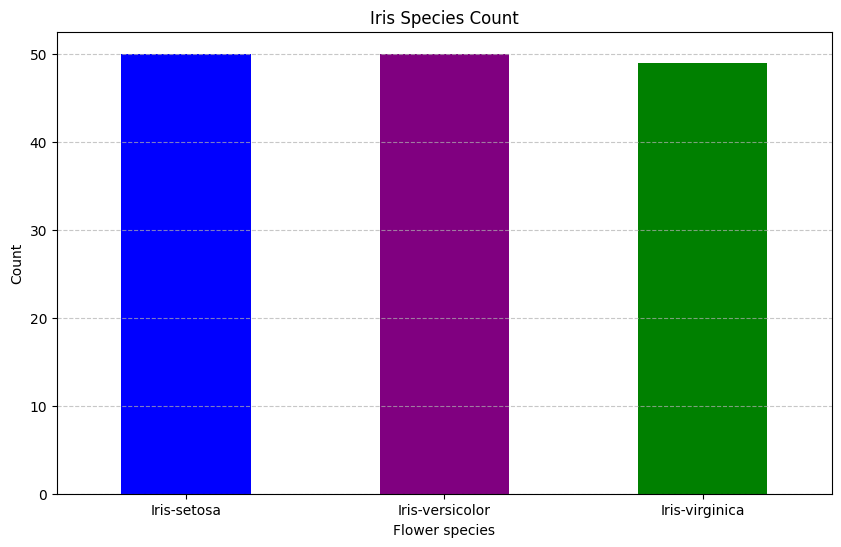

In [26]:
# Create barplot with Matplotlib
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color=['blue', 'purple', 'green'])
plt.title('Iris Species Count')
plt.xlabel('Flower species')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
# Create barplot with Plotly Express
fig = px.bar(
    x=class_counts.index, 
    y=class_counts.values,
    labels={'x': 'Species', 'y': 'Count'},
    title='Iris Species Count',
    color=class_counts.index,
    text=class_counts.values
)
fig.update_layout(xaxis={'categoryorder':'category ascending'}) # display in alphabetic order
#fig.update_layout(xaxis={'categoryorder':'total ascending'}) # sorted based on the sum of values in each category
fig.show()

The classes are well-balanced.

Let's now create a histogram of `petal length`. Note that here we are talking about a histogram as this attribute is a real number. We can use [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) or [plotly.express.histogram](https://plotly.com/python-api-reference/generated/plotly.express.histogram.html) for an interactive view.

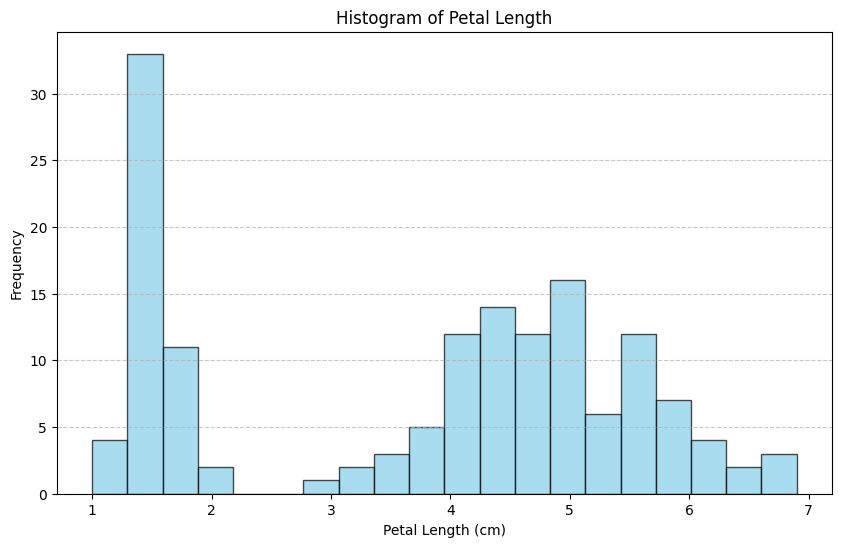

In [28]:
# Create histogram with Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['petal length'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
# Create histogram with Plotly Express
fig = px.histogram(
    data_cleaned, 
    x='petal length',
    nbins=20,
    title='Histogram of Petal Length',
    color_discrete_sequence=['skyblue'],
    opacity=0.7,
    marginal='box'  # Adds a box plot above the histogram
)
fig.update_layout(
    xaxis_title='Petal Length (cm)',
    yaxis_title='Frequency'
)
fig.show()

We can note that there are two separated parts: one ranges in 0.8-2.2 and the other in 2.8-7.2. We can explore more by adding colours with respect to the class labels.

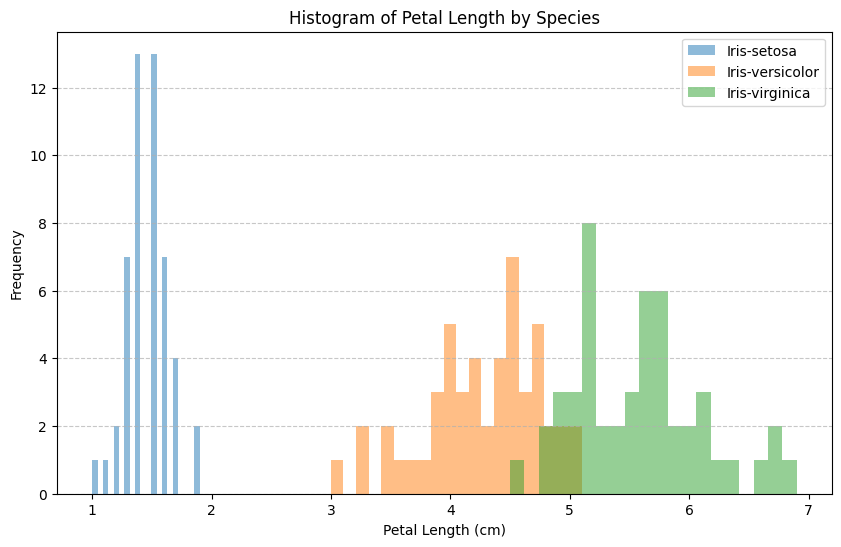

In [30]:
# Matplotlib - Histogram by class
plt.figure(figsize=(10, 6))
for species in data_cleaned['class'].unique():
    plt.hist(
        data_cleaned[data_cleaned['class'] == species]['petal length'], 
        bins=20, 
        alpha=0.5, 
        label=species
    )
plt.title('Histogram of Petal Length by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The same goes for `plotly.express` version. Here we just specify that the colour should be done based on `class` attribute.

In [31]:
# Plotly Express - Histogram by class
fig = px.histogram(
    data_cleaned, 
    x='petal length',
    color='class',
    nbins=20,
    barmode='overlay',
    opacity=0.7,
    title='Histogram of Petal Length by Species',
    marginal='box'
)
fig.update_layout(
    xaxis_title='Petal Length (cm)',
    yaxis_title='Frequency'
)
fig.show()

As we can see, the left histogram corresponds to the values of `petal length` for *Iris-setosa*. At this point, we can see that this class stands apart from the others. At the same time we note the overlapping values for *Iris-versicolor* and *Iris-virginica*. This overlap may imply difficulties in separating these two classes.

<a id='pairplot'></a>
#### Pairplot

Let's plot a pairplot using [`seaborn.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html). 

<Figure size 2000x2000 with 0 Axes>

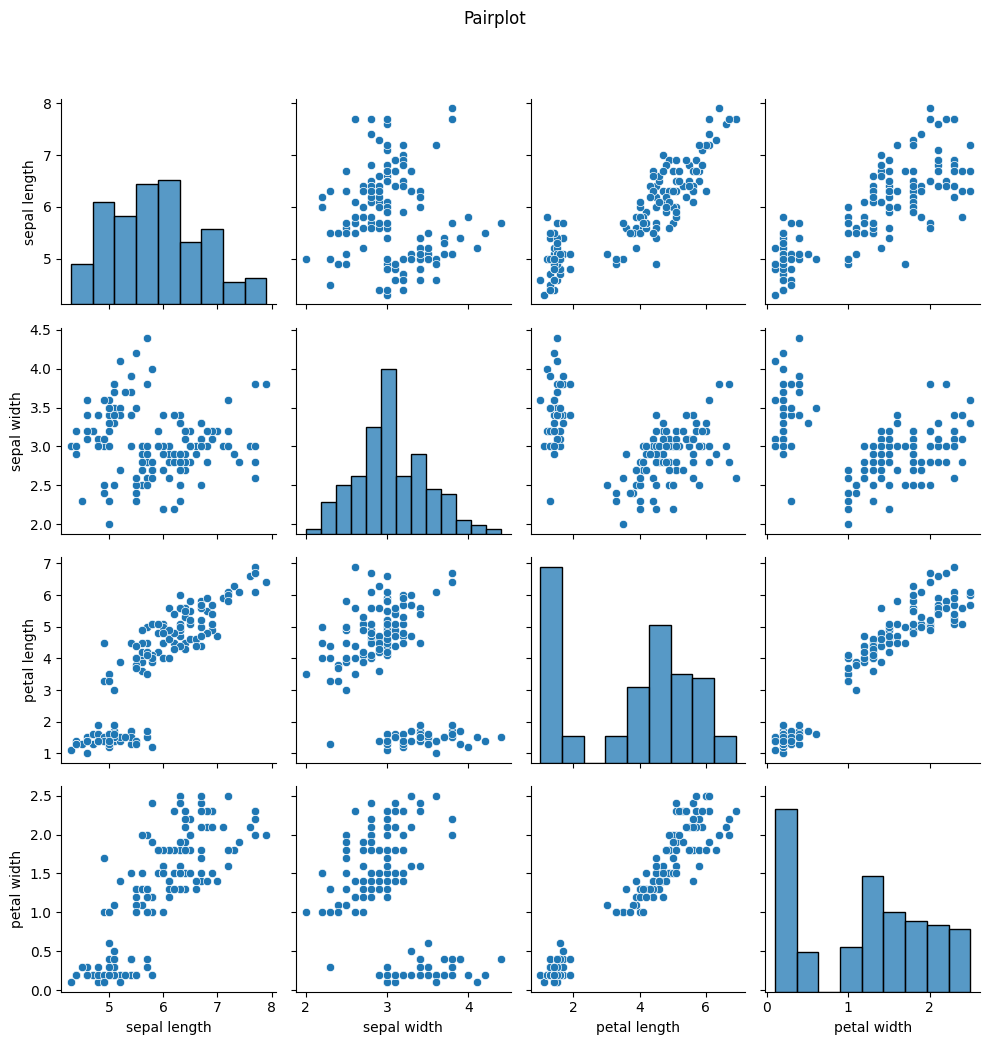

In [32]:
# select columns to plor
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
# Plot the pairplot
fig = plt.figure(figsize = (20,20))
# pair plot
g = sns.pairplot(data=data_cleaned[cols])
# add a title to the figure
g.figure.suptitle('Pairplot', y=1.04)
# Adjust the layout to prevent title overlap
plt.tight_layout()


From this plot, we can observe the following:
* there is a strong positive linear relationship between `petal width` and `petal length`
* we can observe two distinct groups, see `sepal length` vs. `petal length` for example or `petal length` vs. `petal width`. This can already give us an initial idea about a potential number of clusters and which features may influence more the separation.


We can make use of the `class` column to have a look on the data through the class labels. We will assign colors based on the value of `class`. To do so, we will assign the value to `hue` parameter. Mind that by default, the diagonal elements will disply a layered kernel density estimate (KDE). To change that, you can assign value to the `diag_kind` parameter.

<Figure size 2000x2000 with 0 Axes>

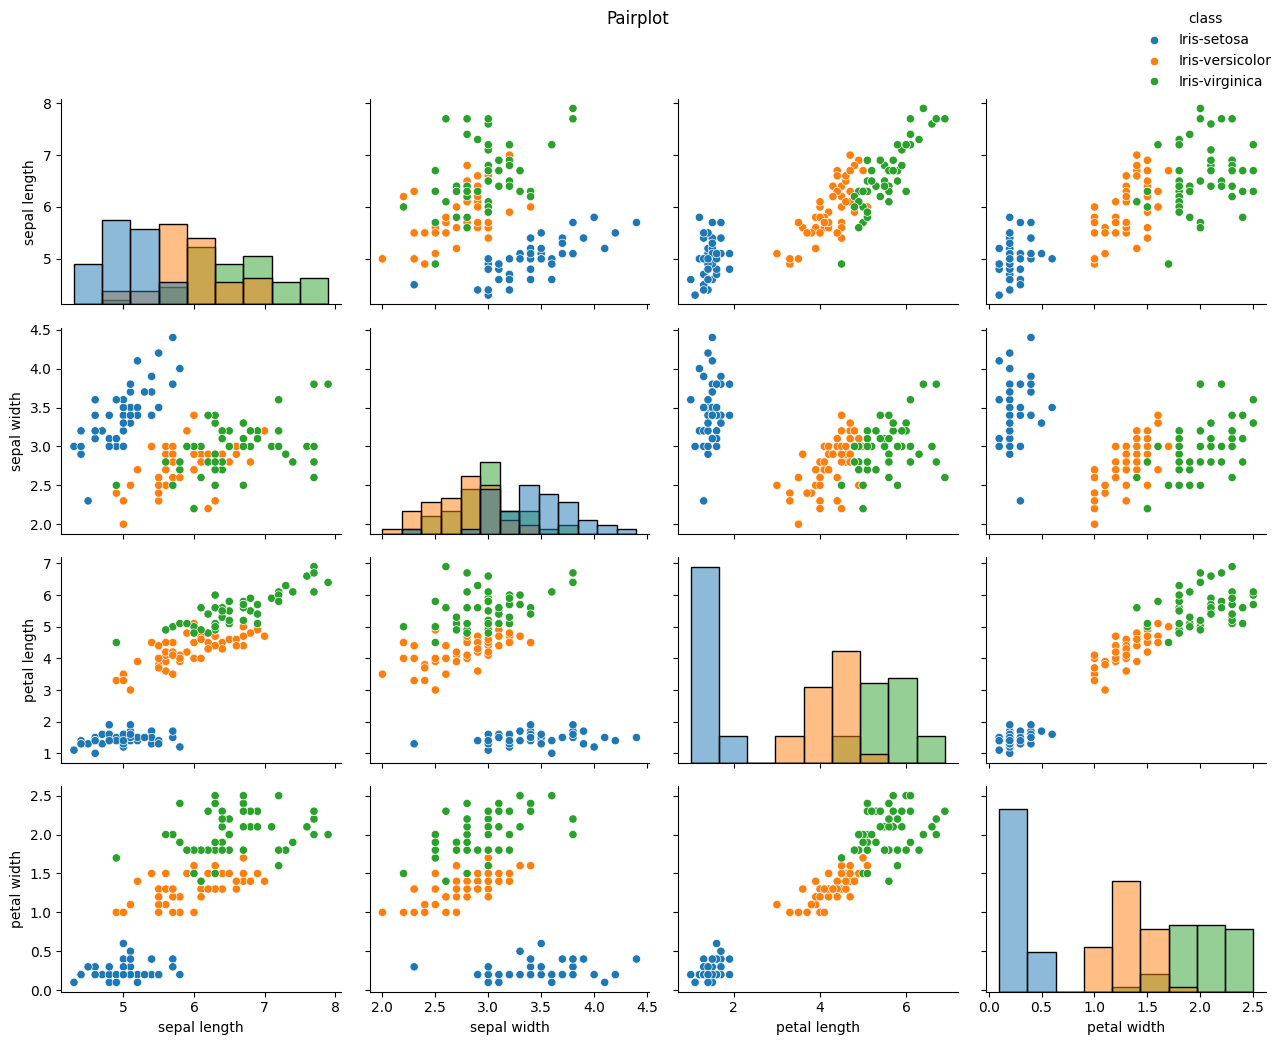

In [33]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))
# pair plot
g = sns.pairplot(data=data_cleaned[cols], hue='class', diag_kind='hist')
# add a title to the figure
g.figure.suptitle('Pairplot', y=1.04)
# Remove the default legend
g._legend.remove() 
# Add new legend
g.add_legend(loc='upper right')
# Adjust the layout to prevent title overlap
plt.tight_layout()

When using colors, we can see that a groups that stands apart corresponds to `Iris-setosa`. We can also observe that some values of `Iris-versicolor` and `Iris-virginica` are similar. This implied that a separation of the entries of these two classes might be difficult.

**Note**: in this use case, there are true class labels which is not usually the case. 

<a id='correlation'></a>
#### Correlation Analysis

**QUESTION**

* Plot the correlation matrix and comment on the result.

*Hint*: to calculate correlations, use the [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method of a DataFrame.

In [34]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [35]:
# ANSWER
corr = data_cleaned[features].corr()

Similar to what we have observed on the pairplot, `petal width` and `petal length` are highly positively correlated (0.9628). We can also observe a rather strong correlation between `sepal length` and `petal length` (0.8737) and between `sepal length` and `petal width`. 

As `petal width` and `petal length` are highly correlated, it is possible to exlude one of these features from the consideration by clustering algorithms in order to decrease dimensionality. But let's keep them for now.

We can visualise this correlation matrix using a heatmap:

<Axes: >

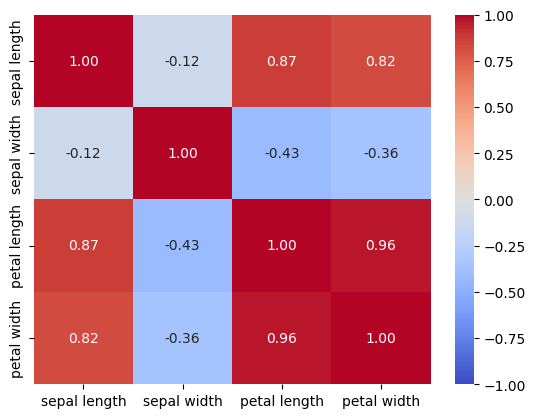

In [36]:
# Create heatmap
sns.heatmap(
        corr,
        annot=True,  # Show correlation values
        cmap='coolwarm',  # Color scheme: red for positive, blue for negative
        vmin=-1, vmax=1,  # Fix scale between -1 and 1
        center=0,  # Center colormap at 0
        fmt='.2f'  # Format correlation values to 2 decimal places
    )

<a id='boxplot'></a>
#### Class-wise Boxplot

Let's display boxplots of each feature using [`seaborn.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot).

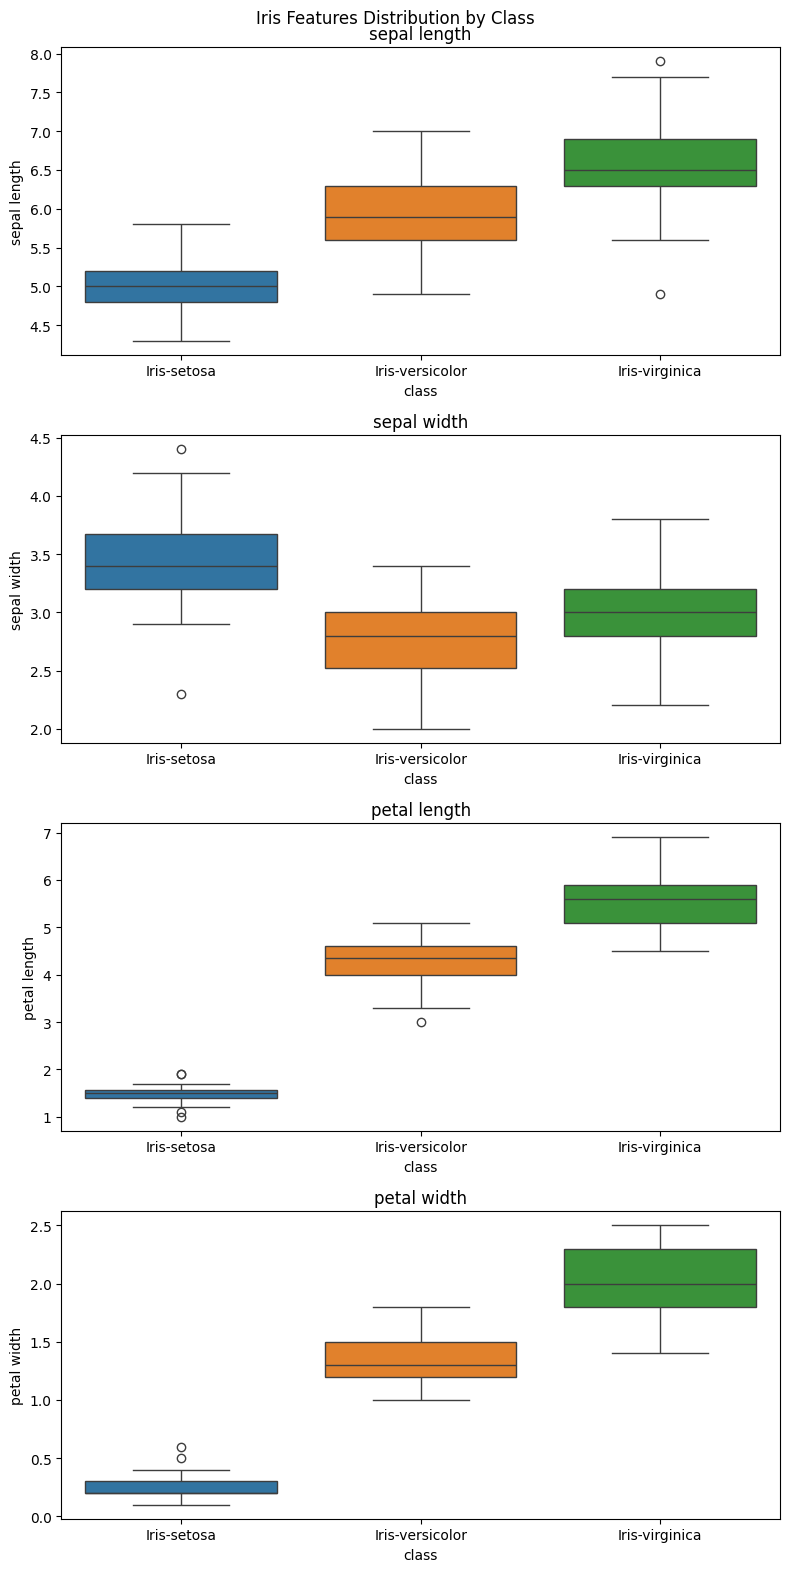

In [37]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16))
fig.suptitle('Iris Features Distribution by Class')

for ax, feature in zip(axes, features):
    sns.boxplot(data=data_cleaned, x='class', y=feature, ax=ax, hue='class')
    ax.set_title(feature)

plt.tight_layout()

Again, when considering `petal length` or `petal width`, we can see that the distribution of `Iris-setosa` is different from the rest. Moreover, we see the overlapping values for two remaining classes.

<a id='pca'></a>
#### Scatter Plot with PCA

As there are four attributes that make it hard to visualise the whole dataset in one plot, we may want to use [*Principal Component Analysis* (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [38]:
# principal compomemt analysis
from sklearn.decomposition import PCA

This implementation only centers the input data but does not apply scaling for each feature before applying the Singular Value Decomposition (SVD). Let's standardise the input data. It is a better way to do it.

Let's apply a [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Recall, that for a given value `x`, a standard score is given by $z = \frac{x - mean(\mathbf{x})}{std(\mathbf{x})}$. Note that this scaler is applied to numerical features only.

In [39]:
# scaler
from sklearn.preprocessing import StandardScaler

In [40]:
# scale data
scaler = StandardScaler()
data_cleaned_scaled = scaler.fit_transform(data_cleaned[features])

Now, let's apply PCA and let's limit the number of principal components to 2.

In [41]:
# create PCA model
pca_scaled = PCA(n_components=2)
# apply PCA to scaled numerical data
pca_scaled_result = pca_scaled.fit_transform(data_cleaned_scaled)

In the resulting array `pca_scaled_result`, you can find the coordinates of each data point in this new reference system. 

In [42]:
# new coordinates of each data point
pca_scaled_result

array([[-2.25269158e+00,  4.79299423e-01],
       [-2.07100441e+00, -6.74233952e-01],
       [-2.35314718e+00, -3.40442064e-01],
       [-2.28876231e+00, -5.95440778e-01],
       [-2.37729413e+00,  6.46885300e-01],
       [-2.06233579e+00,  1.48735169e+00],
       [-2.43205441e+00,  5.01784240e-02],
       [-2.22124438e+00,  2.22920844e-01],
       [-2.32468093e+00, -1.11233754e+00],
       [-2.17393647e+00, -4.69164509e-01],
       [-2.15372644e+00,  1.04128247e+00],
       [-2.31439973e+00,  1.34128141e-01],
       [-2.20836461e+00, -7.28302820e-01],
       [-2.62241020e+00, -9.57873840e-01],
       [-2.18502153e+00,  1.85550449e+00],
       [-2.24685180e+00,  2.68321162e+00],
       [-2.19408649e+00,  1.48183222e+00],
       [-2.17837789e+00,  4.88282008e-01],
       [-1.88595391e+00,  1.40095580e+00],
       [-2.33010833e+00,  1.12767836e+00],
       [-1.90318298e+00,  4.06025713e-01],
       [-2.19423860e+00,  9.23988780e-01],
       [-2.76123087e+00,  4.61020699e-01],
       [-1.

In [43]:
# the right singular vectors of the centered input data, parallel to its eigenvectors
# .T is used to transpose the array
pca_scaled.components_.T

array([[ 0.52206199,  0.3733408 ],
       [-0.26769214,  0.92485914],
       [ 0.58031186,  0.02431115],
       [ 0.56482771,  0.06827292]])

It is possible to check the variance explained by the principal components with `pca_scaled.explained_variance_ratio_`:

In [44]:
pca_scaled.explained_variance_ratio_

array([0.72991022, 0.22858172])

**QUESTIONS**

* Create a DataFrame `pca_df` containing the result of PCA. This DataFrame should contain 2 columns: `PC1` and `PC2`
* Create a new DataFrame `data_cleaned_pca` by contactenating `data_cleaned` and `pca_scaled_df`. Mind that the index of `data_cleaned` has been modified during the cleaning step. Reset the index before concatenation.


In [45]:
# ANSWER
pca_df = pd.DataFrame(data=pca_scaled_result, columns=['PC1', 'PC2'])

In [46]:
# ANSWER
data_cleaned_pca = pd.concat([pca_df, data_cleaned[['class']].reset_index(drop=True)], axis=1)

Let's visualise our datapoint in these new coordinate system. To do so, we will use `PC1` and `PC2` columns.

In [47]:
# Create interactive scatter plot
fig = px.scatter(
        data_cleaned_pca,
        x='PC1',
        y='PC2',
        color='class',
        title='PCA visualization of all flowers'
)
# Add variance explained
var_explained = pca_scaled.explained_variance_ratio_
fig.update_layout(
        xaxis_title=f"PC1 ({var_explained[0]:.1%} variance explained)",
        yaxis_title=f"PC2 ({var_explained[1]:.1%} variance explained)"
)
fig.show()

We can see that *Iris-setosa* stands separately from the other species when considering all the features. And as we have seen in the previous analysis, there are overlapping regions between *Iris-versicolor* and *Iris-setosa*.

## Task #3: Prepare Data for Clustering

We are going to create clusters without the use of `class` attribute. So let's drop this column.

**QUESTIONS**

* Create a DataFrame `df_clustering` by droping the column `class`

In [48]:
# ANSWER
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
df_clustering = data_cleaned[features]

Even though in our case the attributes have comparable scales, let's apply a [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Recall, that for a given value `x`, a standard score is given by $z = \frac{x - mean(\mathbf{x})}{std(\mathbf{x})}$, i.e. it removes the mean and scales the data to unit variance. 

In [49]:
# scaler
from sklearn.preprocessing import StandardScaler

In [50]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[-0.8980334   1.01240113 -1.33325507 -1.30862368]
 [-1.13956224 -0.1373532  -1.33325507 -1.30862368]
 [-1.38109108  0.32254853 -1.39001364 -1.30862368]
 [-1.5018555   0.09259766 -1.2764965  -1.30862368]
 [-1.01879782  1.242352   -1.33325507 -1.30862368]
 [-0.53574014  1.9322046  -1.16297935 -1.04548613]
 [-1.5018555   0.78245027 -1.33325507 -1.17705491]
 [-1.01879782  0.78245027 -1.2764965  -1.30862368]
 [-1.74338434 -0.36730407 -1.33325507 -1.30862368]
 [-1.13956224  0.09259766 -1.2764965  -1.44019246]
 [-0.53574014  1.47230287 -1.2764965  -1.30862368]
 [-1.26032666  0.78245027 -1.21973792 -1.30862368]
 [-1.26032666 -0.1373532  -1.33325507 -1.44019246]
 [-1.86414876 -0.1373532  -1.50353079 -1.44019246]
 [-0.05268246  2.16215547 -1.44677222 -1.30862368]
 [-0.17344688  3.08195894 -1.2764965  -1.04548613]
 [-0.53574014  1.9322046  -1.39001364 -1.04548613]
 [-0.8980334   1.01240113 -1.33325507 -1.17705491]
 [-0.17344688  1.70225374 -1.16297935 -1.17705491]
 [-0.8980334   1.70225374 -1.27

,sepal length,sepal width,petal length,petal width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


## Task #4: Apply k-means Clustering and Find the Optimal Number of Clusters using Elbow Method

To apply **k-means clustering**, we are going to use [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

Mind that this algorithm requires a number of clusters as a parameter `k`. Let's first try `k=3` and then find the optimal number of clusters. We can also fix `random_state` for the reproducibility of the results.

In [51]:
# k-means
from sklearn.cluster import KMeans

In [52]:
# number of clusters 
k = 3
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1000)
# fit scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=3, random_state=1000)

We can check the associated labels using `labels_` attribute.

In [53]:
# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 0 2 2
 0]


To see the sum of squared distances of samples to their closest cluster center, use `inertia_` attribute:

In [54]:
# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")

Sum of squared distances: 139.03857537441158


This value can be used for finding the optimal number of clusters using the *Elbow method*. To do that let's vary the number of clusters `k`, apply k-means algorithm and store the corresponding intertia values. Then, let's plot the result and determine the best `k`.

**QUESTIONS**

* Find the optimal `k` using Elbow method

In [55]:
# ANSWER
inertias = []
klabels = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1000)
    kmeans.fit(scaled_data_df)
    inertias.append(kmeans.inertia_)
    klabels.append(kmeans.labels_)

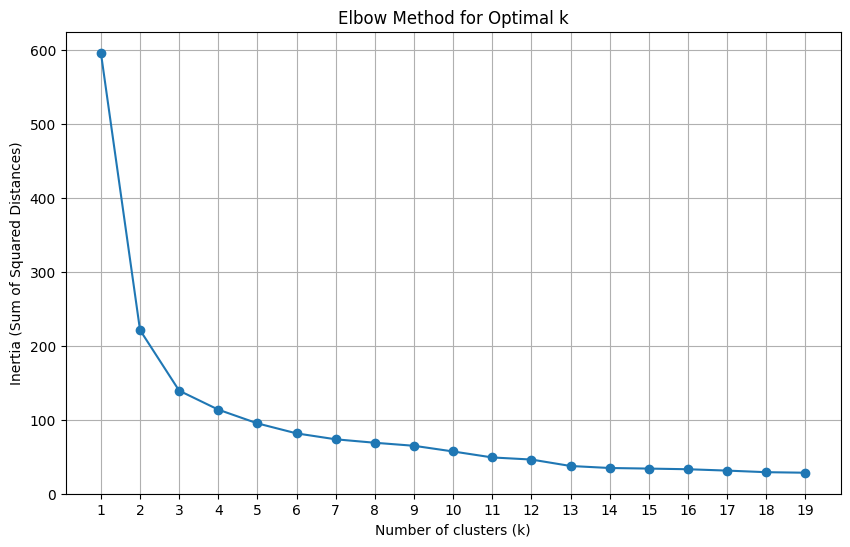

In [56]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(inertias) + 1), inertias, marker='o')
plt.title('Elbow Method for Optimal k')

plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1, len(inertias) + 1))
plt.grid()
plt.show()

**QUESTIONS**

* Add a column `cluster kmeans` to the `data_cleaned` DataFrame containing the labels of k-means clustering for `k=3`

In [57]:
# ANSWER
data_cleaned['cluster kmeans'] = labels

## Task #5: Cluster Evaluation using Silhouette Coefficient

To evaluate the quality of the clustering, we can use **Silhouette Coefficient**. The Silhouette Coefficient for a sample is given by $(b - a) / max(a, b)$ where `b` is the distance between a sample and the nearest cluster that the sample is not a part of, and `a` is the mean intra-cluster distance (i.e. the mean distance between a sample and all other samples in the same cluster). 

The silhouette score ranges from -1 to 1 and indicates how well each data point fits within its assigned cluster:

* Score near +1 means:
    - The data point is far from neighboring clusters
    - The point is well-matched to its cluster
    - Indicates very distinct, well-separated clustering
* Score near 0 means:
    - The data point is close to the decision boundary between clusters
    - The point could potentially belong to either cluster
    - Suggests overlapping or not well-defined clusters
* Score near -1 means:
    - The data point might be assigned to the wrong cluster
    - The point is closer to points in another cluster than its own
    - Indicates poor clustering or potential misassignments

We can use [`sklearn.metrics.silhouette_score`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.silhouette_score.html) and [`sklearn.metrics.silhouette_samples`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html)

In [58]:
# silhouette scores
from sklearn.metrics import silhouette_score, silhouette_samples

**QUESTIONS**

* For k-means clustering with `k=3`, calculate Silhouette score for each data point, for each cluster and average silhouette score 
* Display Silhouette score plot
* Comment

In [59]:
# ANSWER
silhouette_avg = silhouette_score(scaled_data_df, labels)
sample_silhouette_values = silhouette_samples(scaled_data_df, labels)

In [60]:
def plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=3):
    # Create the plot
    fig = plt.figure(figsize=(10, 6))
    
    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette scores for cluster i
        ith_cluster_values = sample_silhouette_values[labels == i]
        ith_cluster_values.sort()
        
        size_cluster_i = ith_cluster_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_values,
                         alpha=0.7)
        
        # Label the silhouette plots
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        
        y_lower = y_upper + 10
    
    # Add vertical line for average silhouette score
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', 
                label=f'Average Silhouette: {silhouette_avg:.3f}')
    
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return fig

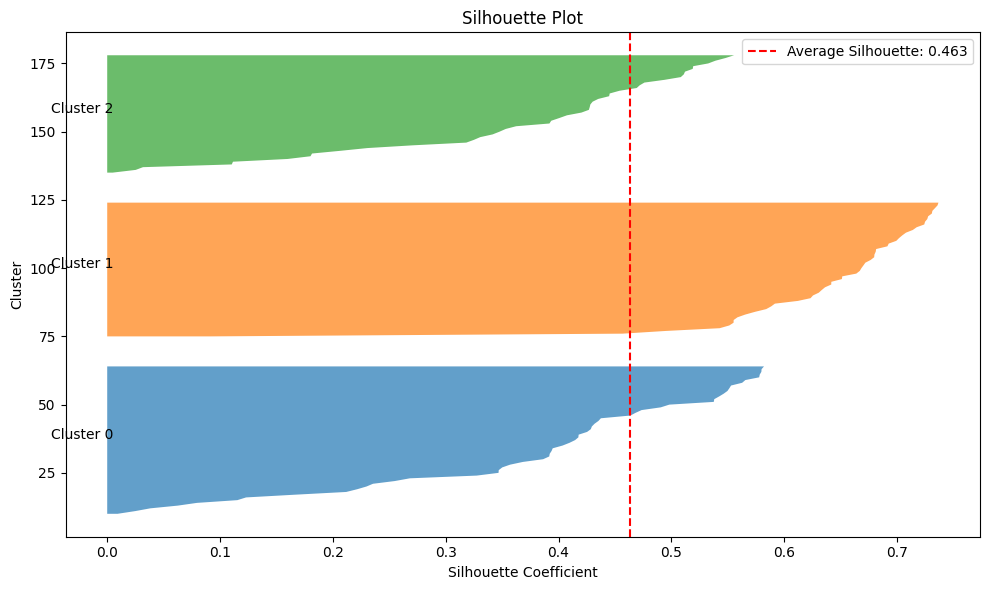

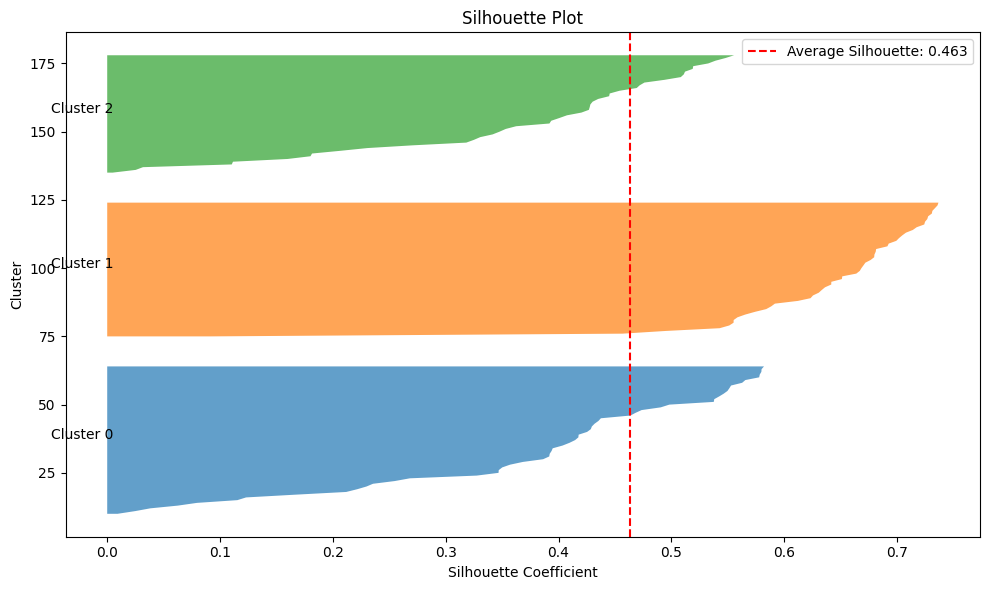

In [61]:
plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=3)

As general guidelines, the plot can be interpreted by looking at:
* *the thickness of the clusters (number of points)*: in our case, the clusters are almost of the same size (e.g. 0: 55, 1:50, 2:44 <- note that the exact numbers can vary depending on the random seed);
* *check if any cluster has many negative values*: in our case, none of the clusters contains any negative values;
* *check the consistency of the silhouette widths within clusters*: we note that Cluster 0 and Cluster 2 have big range of silhouette values;
* *the average value*. Recall that in general, the following interpretation applies:
    - \> 0.7: Strong clustering structure
    - 0.5 - 0.7: Reasonable clustering structure
    - 0.25 - 0.5: Weak clustering structure
    - < 0.25: No substantial clustering structure

In our case the average Silhouette score equals to 0.463 (! can vary depending on the results of k-means) which can be considered as rather weak clustering structure. Only Cluster 1 is always higher than this average score.
* *Cluster Silhouette scores*: in our case, 0: 0.382, 1: 0.64, 2: 0.36. For Cluster 0 and Cluster 2, the scores are low. 

To count the number of elements per cluster, you can use [`value_counts()`](https://pandas.pydata.org/docs/dev/reference/api/pandas.Series.value_counts.html) method of a `pandas.Series`.

In [62]:
# number of elements per cluster
data_cleaned['cluster kmeans'].value_counts()

cluster kmeans
0    55
1    50
2    44
Name: count, dtype: int64

**QUESTION:**

* Find the optimal `k` in *k-means* using the average Silhouette Score. To do so, let's vary *k* and keep a track of the average silhouette score. We need to pick the value that corresponds to the peak of Silhouette score.

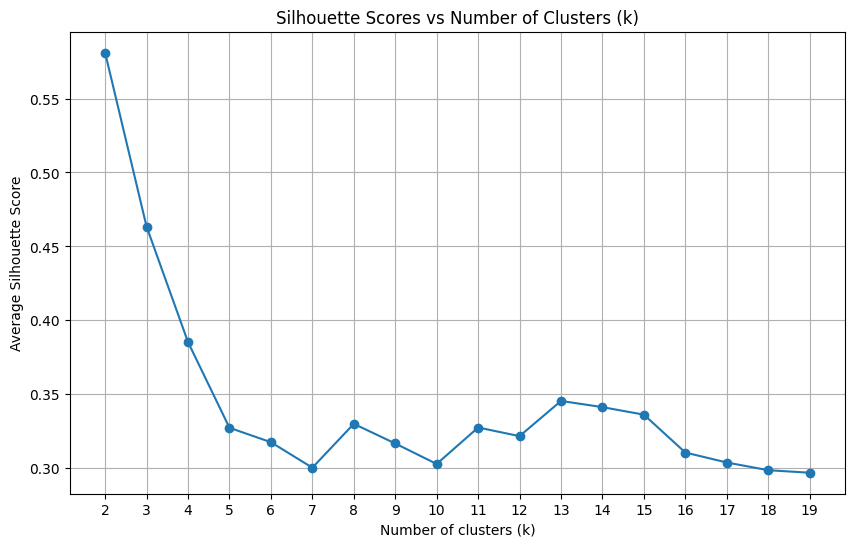

In [63]:
## ANSWER
# Find optimal k
silhouette_avgs = []
for k in range(2, len(inertias) + 1):
    silhouette_avgs.append(silhouette_score(scaled_data_df, klabels[k-1]))

# Plot silhouette scores vs k
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(silhouette_avgs) + 2), silhouette_avgs, marker='o')
plt.title('Silhouette Scores vs Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(range(2, len(silhouette_avgs) + 2))
plt.grid()
plt.show()

$\to$ The optimal value of `k` is 2. This is obvious, given the overlapping values of Iris-versicolor and Iris-virginica.

## Task #6: Apply Hierarchical Clustering

**QUESTIONS**

* Apply Agglomerative clustering with different linkage options: complete, average, single. 

*Hint*: use [`sklearn.cluster.AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
* For each linkage, draw a dendrogram. You can check the code [here](https://scikit-learn.org/1.5/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py). You can check the documentation on [scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram)

*Hint*: check [this example](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)
* Calculate the silhouette scores

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [65]:
import matplotlib.colors as mcolors # named colors
from matplotlib import colormaps as cmaps

In [66]:
def plot_dendrogram(model, lbls, title='Hierarchical Clustering Dendrogram', x_title='Flowers', **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
           model.children_,
           model.distances_,
           counts
       ]).astype(float)

    fig = plt.figure(figsize=(12, 8))
    
    dendrogram(linkage_matrix, labels=lbls, leaf_rotation=90, truncate_mode='level', p=5, **kwargs)
    
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel('Distance')
    
    fig.show()
    
    return fig

C:\Users\jhony\AppData\Local\Temp\ipykernel_19964\2232216083.py:30: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

C:\Users\jhony\AppData\Local\Temp\ipykernel_19964\2232216083.py:30: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

C:\Users\jhony\AppData\Local\Temp\ipykernel_19964\2232216083.py:30: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



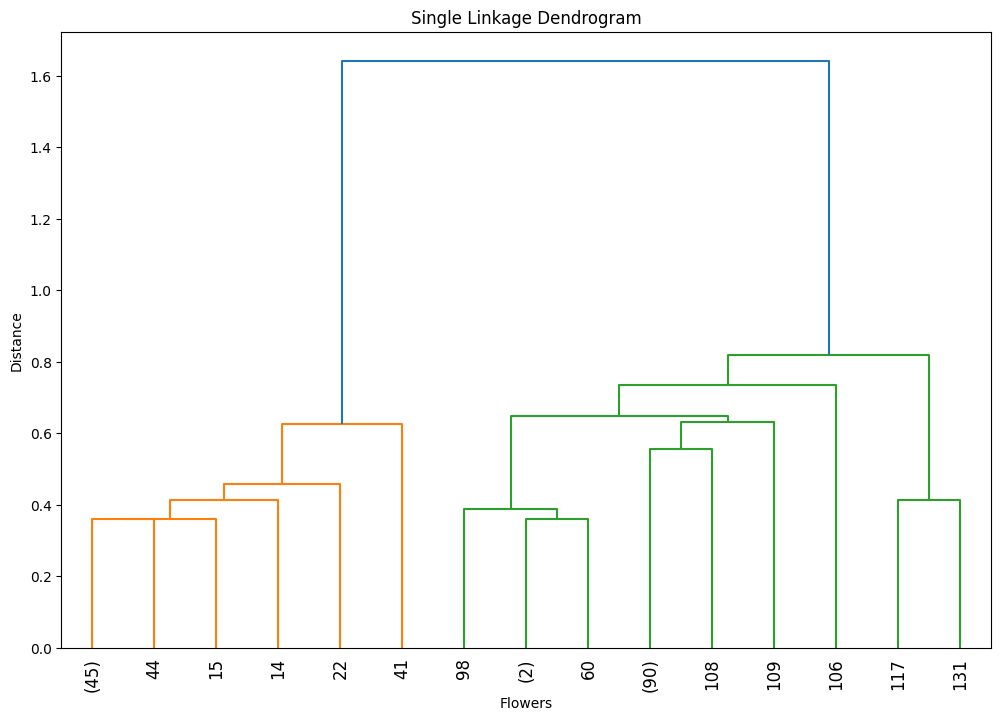

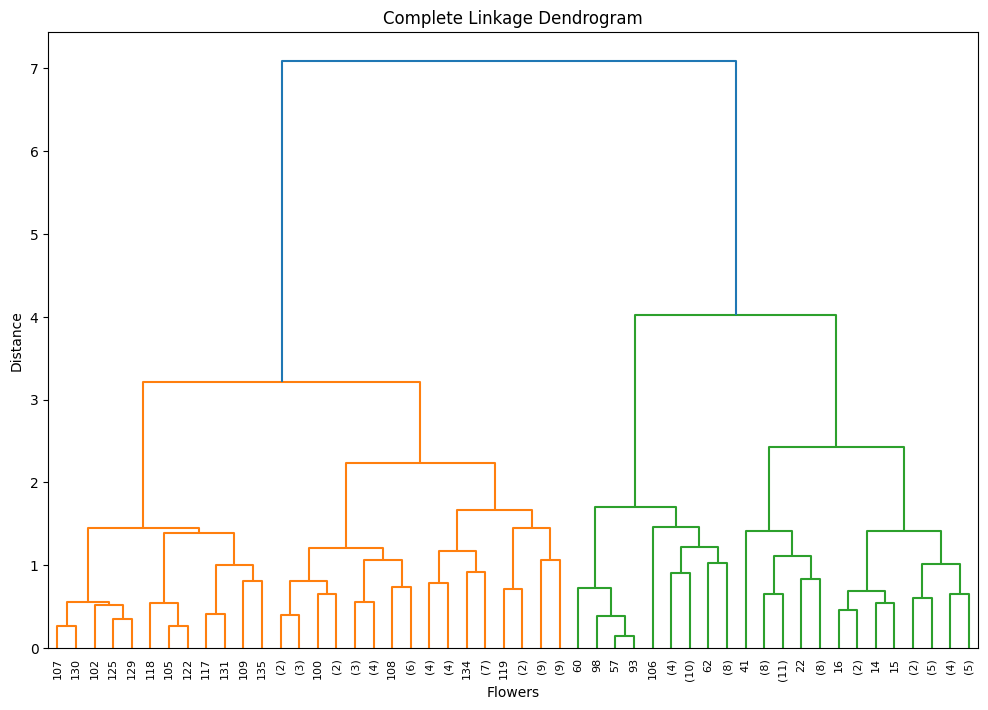

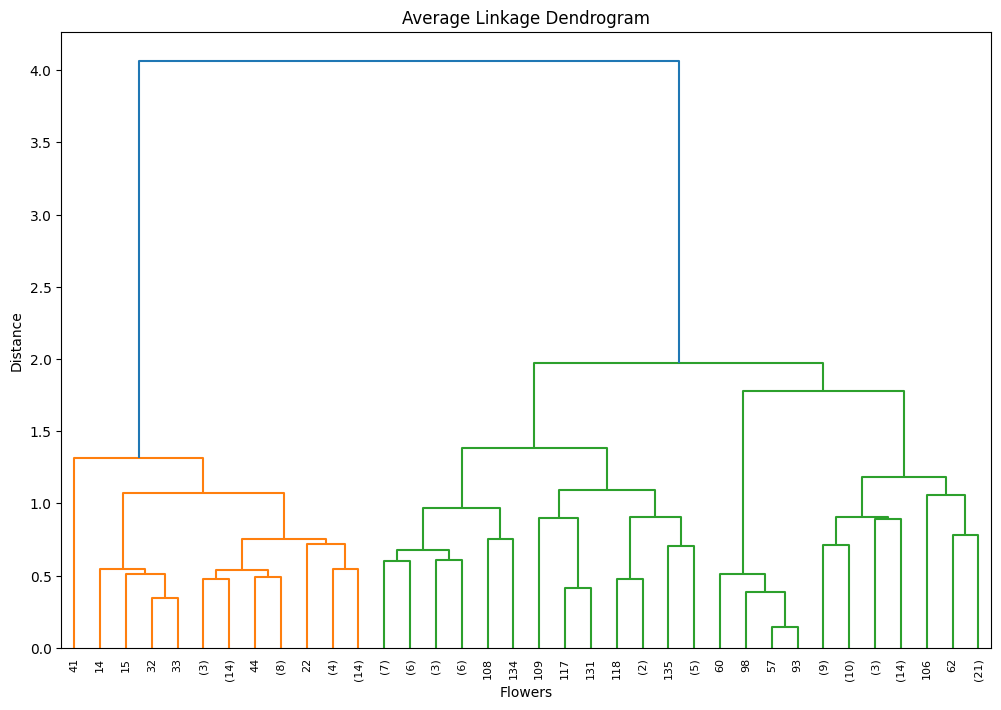

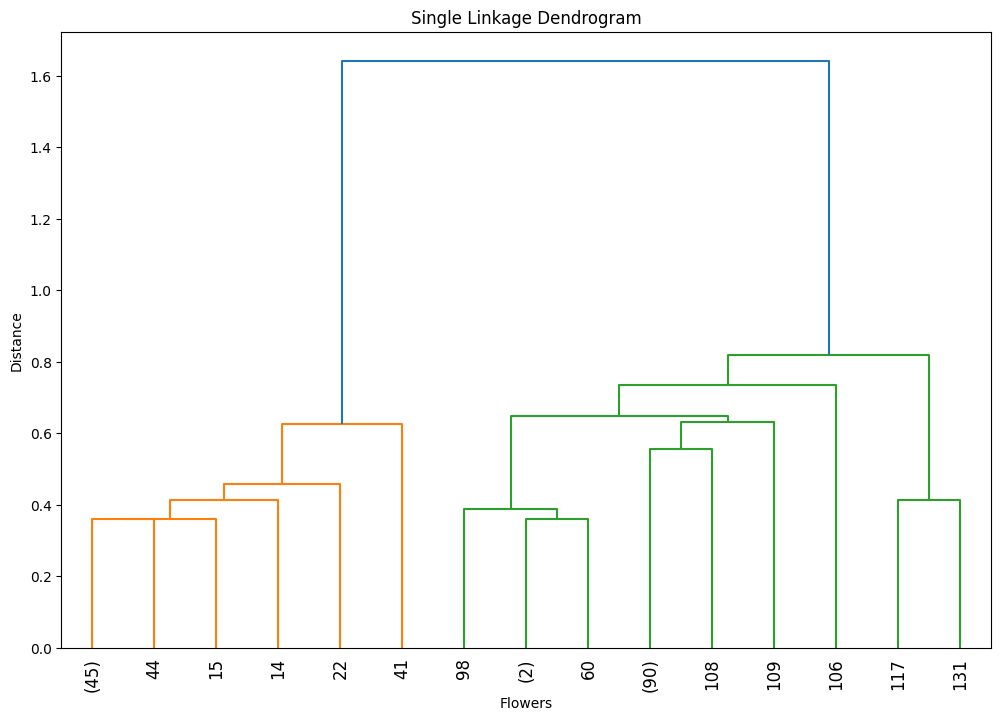

In [67]:
# ANSWER
completeModel = AgglomerativeClustering(n_clusters=None, linkage='complete', distance_threshold=0, compute_distances=True)
completeModel.fit(data_cleaned[features])
averageModel = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=0, compute_distances=True)
averageModel.fit(data_cleaned[features])
singleModel = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=0, compute_distances=True)
singleModel.fit(data_cleaned[features])

# plot dendrograms
plot_dendrogram(completeModel, lbls=data_cleaned.index.tolist(), title='Complete Linkage Dendrogram')
plot_dendrogram(averageModel, lbls=data_cleaned.index.tolist(), title='Average Linkage Dendrogram')
plot_dendrogram(singleModel, lbls=data_cleaned.index.tolist(), title='Single Linkage Dendrogram')

## Task #7: Apply DBSCAN

**QUESTIONS**

* Apply [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) algorithm
* Identify the best values for `eps` for a given `k`

In [68]:
# DBSCAN
from sklearn.cluster import DBSCAN

As Tan *et al.* state:
> The basic approach is to look at the behavior of the distance from a point to its $k$-th nearest neighbor, which we will call the $k$-dist. For points that belong to some cluster, the value of $k$-dist will be small if $k$ is not larger than the cluster size. Note that there will be some variation, depending on the density of the cluster and the random distribution of points, but on average, the range of variation will not be huge if the cluster densities are not radically different. However, for points that are not in a cluster, such as noise points, the $k$-dist will be relatively large. Therefore, if we compute the $k$-dist for all the data points for some k, sort them in increasing order, and then plot the sorted values, we expect to see a sharp change at the value of $k$-dist that corresponds to a suitable value of $Eps$. If we select this distance as the $Eps$ parameter and take the value of k as the MinPts parameter, then points for which $k$-dist is less than $Eps$ will be labeled as core points, while other points will be labeled as noise or border points.

You may want to use [NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) to do that.

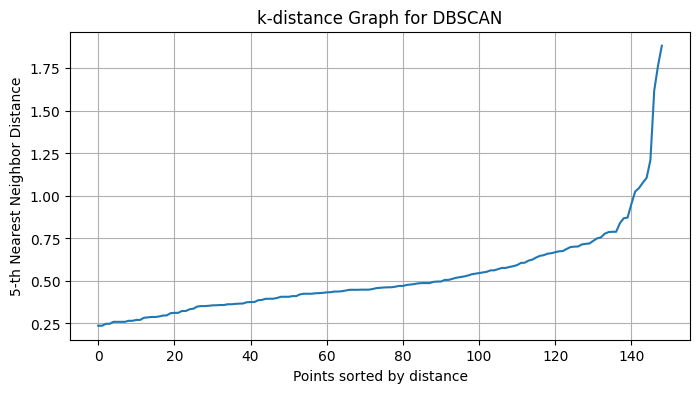

In [69]:
# k nearest neighburs 
from sklearn.neighbors import NearestNeighbors
k = 5  # MinPts
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(scaled_data_df)
distances, indices = nbrs.kneighbors(scaled_data_df)

# Take the k-th nearest distance for each point
k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance Graph for DBSCAN")
plt.grid()
plt.show()

In [70]:
# ANSWER
dbs = DBSCAN(eps=0.75).fit(scaled_data_df)
labels = dbs.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 6


## Task #8: Cluster Characterisation using Apriori algorithm

Now, we would like to describe the obtained cluster. To do so, let's use frequent pattern mining and in particular **Apriori algorithm**. 

**QUESTIONS**
* First, convert numerical features to categorical (low, medium, high) based on quantiles. Add binary columns, e.g. `sepal length low`, `sepal length medium`, `sepal length high` depending on the values. 

*Hint*: to do so, you can use [`quantile()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) method.

In [71]:
quantiles = scaled_data_df.quantile([0.333, 0.66, 1.0])
print(quantiles)

       sepal length  sepal width  petal length  petal width
0.333     -0.535740    -0.367304     -0.872148    -0.632886
0.660      0.512495     0.322549      0.596536     0.491237
1.000      2.483370     3.081959      1.788466     1.717458


In [72]:
# ANSWER
df_binary = pd.DataFrame()
# Add low, medium, high binary columns based on quantiles
df_binary['sepal length low'] = scaled_data_df['sepal length'] <= quantiles.loc[0.333, 'sepal length']
df_binary['sepal length medium'] = (scaled_data_df['sepal length'] > quantiles.loc[0.333, 'sepal length']) & (scaled_data_df['sepal length'] <= quantiles.loc[0.66, 'sepal length'])
df_binary['sepal length high'] = scaled_data_df['sepal length'] > quantiles.loc[0.66, 'sepal length']

df_binary['sepal width low'] = scaled_data_df['sepal width'] <= quantiles.loc[0.333, 'sepal width']
df_binary['sepal width medium'] = (scaled_data_df['sepal width'] > quantiles.loc[0.333, 'sepal width']) & (scaled_data_df['sepal width'] <= quantiles.loc[0.66, 'sepal width'])
df_binary['sepal width high'] = scaled_data_df['sepal width'] > quantiles.loc[0.66, 'sepal width'] 

df_binary['petal length low'] = scaled_data_df['petal length'] <= quantiles.loc[0.333, 'petal length']
df_binary['petal length medium'] = (scaled_data_df['petal length'] > quantiles.loc[0.333, 'petal length']) & (scaled_data_df['petal length'] <= quantiles.loc[0.66, 'petal length'])
df_binary['petal length high'] = scaled_data_df['petal length'] > quantiles.loc[0.66, 'petal length']

df_binary['petal width low'] = scaled_data_df['petal width'] <= quantiles.loc[0.333, 'petal width']
df_binary['petal width medium'] = (scaled_data_df['petal width'] > quantiles.loc[0.333, 'petal width']) & (scaled_data_df['petal width'] <= quantiles.loc[0.66, 'petal width'])
df_binary['petal width high'] = scaled_data_df['petal width'] > quantiles.loc[0.66, 'petal width']

df_binary.head()

,sepal length low,sepal length medium,sepal length high,sepal width low,sepal width medium,sepal width high,petal length low,petal length medium,petal length high,petal width low,petal width medium,petal width high
0,True,False,False,False,False,True,True,False,False,True,False,False
1,True,False,False,False,True,False,True,False,False,True,False,False
2,True,False,False,False,True,False,True,False,False,True,False,False
3,True,False,False,False,True,False,True,False,False,True,False,False
4,True,False,False,False,False,True,True,False,False,True,False,False


To find frequent patterns, we are going to use the following implementation of Apriori algorithm [mlxtend.frequent_patterns.apriori](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/).

In [73]:
# frequent patterns
from mlxtend.frequent_patterns import apriori

We will need to specify `min_support` as a parameter.

In [74]:
def cluster_chars(df, binary_cols, cluster_col, min_support=0.3, min_confidence=0.6):
    cluster_characteristics = {}
    
    cluster_labels = df[cluster_col].unique()
    #print(cluster_labels)
    
    all_itemsets = []
    
    for cluster in cluster_labels:
        # Get data for this cluster
        cluster_data = df_binary[df_binary[cluster_col] == cluster][binary_cols]
        #print(cluster_data.head())
        
        # Find frequent itemsets
        frequent_itemsets = apriori(cluster_data, 
                                  min_support=min_support, 
                                  use_colnames=True)
        
        # add cluster number and store the results 
        if len(frequent_itemsets) > 0:
            frequent_itemsets['cluster'] = cluster
            all_itemsets.append(frequent_itemsets)
            
    # Combine all itemsets into one DataFrame
    all_itemsets_df = pd.concat(all_itemsets)
    
    # Find characteristic itemsets for each cluster
    characteristic_itemsets = {}
    for cluster in cluster_labels:
        # Get itemsets for this cluster
        cluster_itemsets = all_itemsets_df[all_itemsets_df['cluster'] == cluster]
        
        # Get itemsets that appear in other clusters
        other_clusters_itemsets = all_itemsets_df[all_itemsets_df['cluster'] != cluster]
        
        # Find unique itemsets for this cluster
        unique_itemsets = []
        for _, row in cluster_itemsets.iterrows():
            itemset = row['itemsets']
            # Check if this itemset appears in other clusters
            appears_elsewhere = False
            for _, other_row in other_clusters_itemsets.iterrows():
                if other_row['itemsets'] == itemset:
                    appears_elsewhere = True
                    break
            
            if not appears_elsewhere:
                unique_itemsets.append({
                    'itemset': itemset,
                    'support': row['support']
                })
        
        characteristic_itemsets[cluster] = unique_itemsets
    
    return all_itemsets_df, characteristic_itemsets

In [80]:
binary_cols = ['sepal length low', 'sepal length medium',
       'sepal length high', 'sepal width low', 'sepal width medium',
       'sepal width high', 'petal length low', 'petal length medium',
       'petal length high', 'petal width low', 'petal width medium',
       'petal width high']
all_itemsets_df, cluster_characteristics = cluster_chars(df_binary, binary_cols, 'sepal length high', min_support=0.6, min_confidence=0.6)

In [81]:
cluster_characteristics[1]

[{'itemset': frozenset({'sepal length high'}), 'support': 1.0},
 {'itemset': frozenset({'petal length high'}), 'support': 0.7843137254901961},
 {'itemset': frozenset({'petal width high'}), 'support': 0.7450980392156863},
 {'itemset': frozenset({'petal length high', 'sepal length high'}),
  'support': 0.7843137254901961},
 {'itemset': frozenset({'petal width high', 'sepal length high'}),
  'support': 0.7450980392156863},
 {'itemset': frozenset({'petal length high', 'petal width high'}),
  'support': 0.7254901960784313},
 {'itemset': frozenset({'petal length high',
             'petal width high',
             'sepal length high'}),
  'support': 0.7254901960784313}]

In [82]:
# Print results
for cluster, itemsets in cluster_characteristics.items():
    print(f"\nCluster {cluster} characteristic itemsets:")
    if len(itemsets) > 0:
        for item in itemsets:
            print(f"Itemset: {item['itemset']}, Support: {item['support']:.3f}")
    else:
        print("No characteristic itemsets found")


Cluster False characteristic itemsets:
No characteristic itemsets found

Cluster True characteristic itemsets:
Itemset: frozenset({'sepal length high'}), Support: 1.000
Itemset: frozenset({'petal length high'}), Support: 0.784
Itemset: frozenset({'petal width high'}), Support: 0.745
Itemset: frozenset({'sepal length high', 'petal length high'}), Support: 0.784
Itemset: frozenset({'sepal length high', 'petal width high'}), Support: 0.745
Itemset: frozenset({'petal width high', 'petal length high'}), Support: 0.725
Itemset: frozenset({'sepal length high', 'petal width high', 'petal length high'}), Support: 0.725
